<div>
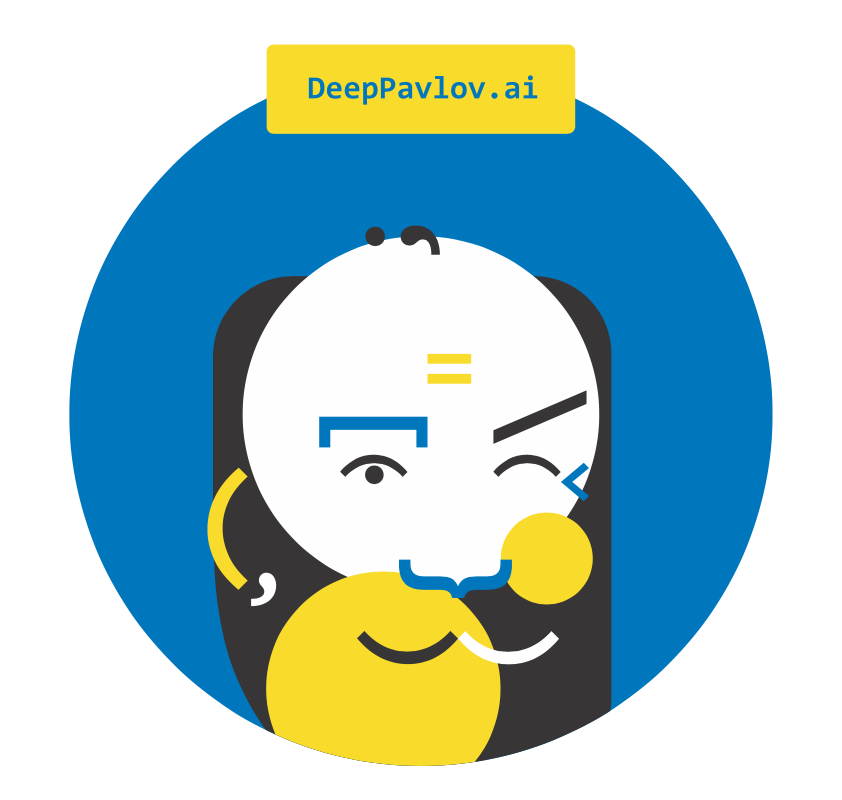
</div>

# <center>Triplet Extraction for English</center>

<center>Demo 26.07.2021</center>

In this small tutorial, we are going to show how the relation extraction could be done with a sentence as an input. The entity pairs' extraction would be done automatically. 

For this task we used already trained relation extraction model for English language on DocRED (for more details please refer to Relation_extraction_English_tutorial)

### Config

In [1]:
from deeppavlov import configs, build_model

In [12]:
%cat deeppavlov/configs/relation_extraction/triplet_extraction_eng.json

{
  "chainer": {
    "in": ["x"],
    "pipe": [
      {
        "class_name": "ner_chunker",
        "batch_size": 16,
        "in": ["x"],
        "out": ["text_batch_list", "nums_batch_list", "sentences_offsets_batch_list", "sentences_batch_list"]
      },
      {
        "class_name": "entity_detection_parser",
        "thres_proba": 0.05,
        "o_tag": "O",
        "tags_file": "{NER_PATH}/tag.dict",
        "return_entities_with_tags": true,
        "id": "edp"
      },
      {
        "class_name": "kbqa_entity_linker",
        "id": "linker_entities",
        "load_path": "{DOWNLOADS_PATH}/wikidata_eng",
        "inverted_index_filename": "inverted_index_eng.pickle",
        "entities_list_filename": "entities_list.pickle",
        "q2name_filename": "wiki_eng_q_to_name.pickle",
        "build_inverted_index": false,
        "lemmatize": false,
        "use_descriptions": false,
        "include_mention": false,
        "use_prefix_tree": false,
        "lang": "en"
      },


In [24]:
# help function to print the output nicely
def print_found_relation(relation):
    print("\n".join([str(l3) for l1 in res for l2 in l1 for l3 in l2]))

In [2]:
tr_extr_eng = build_model(configs.relation_extraction.triplet_extraction_eng, download=False)

[nltk_data] Downloading package punkt to /home/evseev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/evseev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


2021-07-26 16:48:30.105 WARNING in 'deeppavlov.core.common.registry'['registry'] at line 56: Registry name "triplet_extractor" has been already registered and will be overwritten.


2021-07-26 16:48:30.451 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /cephfs/home/evseev/.deeppavlov/models/ner_ontonotes_bert/tag.dict]








The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API




Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use standa

2021-07-26 16:49:51.618 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /cephfs/home/evseev/.deeppavlov/models/ner_ontonotes_bert/model]



INFO:tensorflow:Restoring parameters from /cephfs/home/evseev/.deeppavlov/models/ner_ontonotes_bert/model


2021-07-26 16:50:08.482 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 145: Load path /cephfs/home/evseev/.deeppavlov/models/re_docred_old_setting/model is given.
2021-07-26 16:50:08.489 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 152: Load path /cephfs/home/evseev/.deeppavlov/models/re_docred_old_setting/model.pth.tar exists.
2021-07-26 16:50:08.490 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 153: Initializing `REBertModel` from saved.
2021-07-26 16:50:08.492 INFO in 'deeppavlov.models.classifiers.torch_re_bert'['torch_re_bert'] at line 157: From pretrained bert-base-uncased.
2021-07-26 16:50:32.708 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 159: Loading weights from /cephfs/home/evseev/.deeppavlov/models/re_docred_old_setting/model.pth.tar.
2021-07-26 16:50:47.91 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 98: Model was successfully initialized! Model summary:
 BertWi

In [28]:
# example 1

sentence = "Barack Obama is married to Michelle Obama."
res = tr_extr_eng([sentence])

print_found_relation(res)

['barack obama', 'spouse', 'michelle obama']
['Q76', 'P26', 'Q13133']


In [29]:
# example 2

sentence = "Moscow is the capital of Russia."      
res = tr_extr_eng([sentence])

print_found_relation(res)

['moscow', 'capital of', 'russia']
['Q649', 'P1376', 'Q159']


In [30]:
# example 3

sentence = "The Iron Age started around 1200 B.C."
res = tr_extr_eng([sentence])

print_found_relation(res)

['the iron age', 'part of', 'around 1200 b']
['Q11764', 'P361', 'Q28380195']


In [31]:
# example 4

sentence = "Elon Musk was born in South Africa."      
res = tr_extr_eng([sentence])

print("\n".join(res))

TypeError: sequence item 0: expected str instance, list found

In [7]:
# example 5

sentence = "Elon Musk owns Tesla Company."      
res = tr_extr_eng([sentence])

print("\n".join(res))

[[[['elon musk', 'parent organization', 'tesla company'], ['Q317521', 'P749', 'Q862303']]]]


In [8]:
# example 6

sentence = "Elon Musk has three children."      
res = tr_extr_eng([sentence])

print("\n".join(res))

[[[['elon musk', 'child', 'three'], ['Q317521', 'P40', 'Q478536']]]]


Let's try on a bigger text.

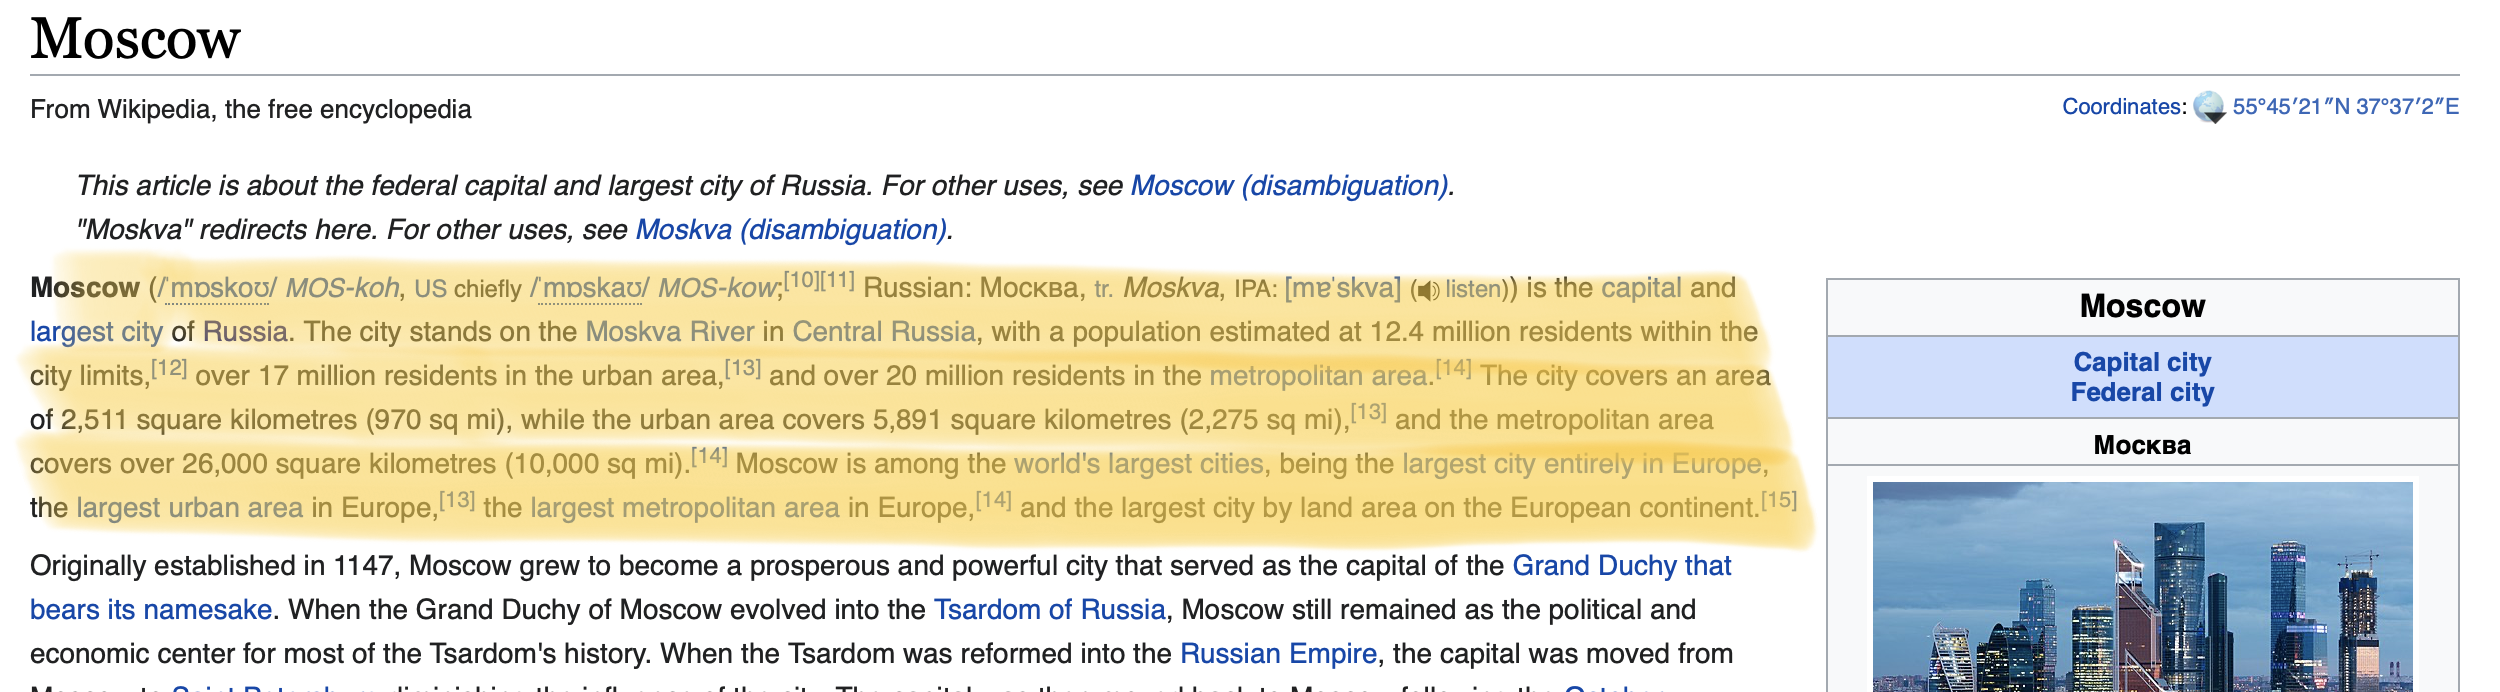

In [32]:
# example 7

text = "Moscow is the capital and largest city of Russia. The city stands on the Moskva River in Central Russia, with a population estimated at 12.4 million residents within the city limits, over 17 million residents in the urban area, and over 20 million residents in the metropolitan area. The city covers an area of 2,511 square kilometres (970 sq mi), while the urban area covers 5,891 square kilometres (2,275 sq mi), and the metropolitan area covers over 26,000 square kilometres (10,000 sq mi). Moscow is among the world's largest cities, being the largest city entirely in Europe, the largest urban area in Europe, the largest metropolitan area in Europe, and the largest city by land area on the European continent."
res = tr_extr_eng([text])

print_found_relation(res)

['moscow', 'capital of', 'russia']
['Q649', 'P1376', 'Q159']
['the moskva river', 'located in the administrative territorial entity', 'central russia']
['Q175117', 'P131', 'Q4504093']
['the moskva river', 'country', '12']
['Q175117', 'P17', 'Q175014']
['the moskva river', 'country', '4 million']
['Q175117', 'P17', 'Q3230339']
['the moskva river', 'country', '17 million']
['Q175117', 'P17', 'Q38526']
['the moskva river', 'country', '20 million']
['Q175117', 'P17', 'Q1211313']
['central russia', 'located in or next to body of water', '12']
['Q4504093', 'P206', 'Q175014']
['central russia', 'located in or next to body of water', '4 million']
['Q4504093', 'P206', 'Q3230339']
['central russia', 'located in or next to body of water', '17 million']
['Q4504093', 'P206', 'Q38526']
['central russia', 'located in or next to body of water', '20 million']
['Q4504093', 'P206', 'Q1211313']
['12', 'country', '4 million']
['Q175014', 'P17', 'Q3230339']
['12', 'dissolved, abolished or demolished', '17 m

### Problems:

In [26]:
sentence = "Barack Obama is married to Michelle Obama, born Michelle Robinson."
res = tr_extr_eng([sentence])

print_found_relation(res)

['barack obama', 'spouse', 'michelle obama']
['Q76', 'P26', 'Q13133']
['barack obama', 'spouse', 'michelle robinson']
['Q76', 'P26', 'Q13133']
['michelle obama', 'spouse', 'michelle robinson']
['Q13133', 'P26', 'Q13133']


In [27]:
sentence = "Barack Obama has two daughters: Sasha and Malia."
res = tr_extr_eng([sentence])

print_found_relation(res)

['barack obama', 'child', 'sasha']
['Q76', 'P40', 'Q63317']
['barack obama', 'child', 'malia']
['Q76', 'P40', 'Q3843915']
['barack obama', 'child', 'two']
['Q76', 'P40', 'Q7858803']
['sasha', 'sibling', 'malia']
['Q63317', 'P3373', 'Q3843915']
['sasha', 'father', 'two']
['Q63317', 'P22', 'Q7858803']
['malia', 'father', 'two']
['Q3843915', 'P22', 'Q7858803']
